In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Stock Market Prediction.csv', parse_dates=['Date'], dayfirst=True)
df.head()

<ipython-input-3-301824aea701>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Stock Market Prediction.csv', parse_dates=['Date'], dayfirst=True)


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2035 non-null   datetime64[ns]
 1   Open                  2035 non-null   float64       
 2   High                  2035 non-null   float64       
 3   Low                   2035 non-null   float64       
 4   Last                  2035 non-null   float64       
 5   Close                 2035 non-null   float64       
 6   Total Trade Quantity  2035 non-null   int64         
 7   Turnover (Lacs)       2035 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 127.3 KB


In [ ]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [ ]:
df.duplicated().sum()

0

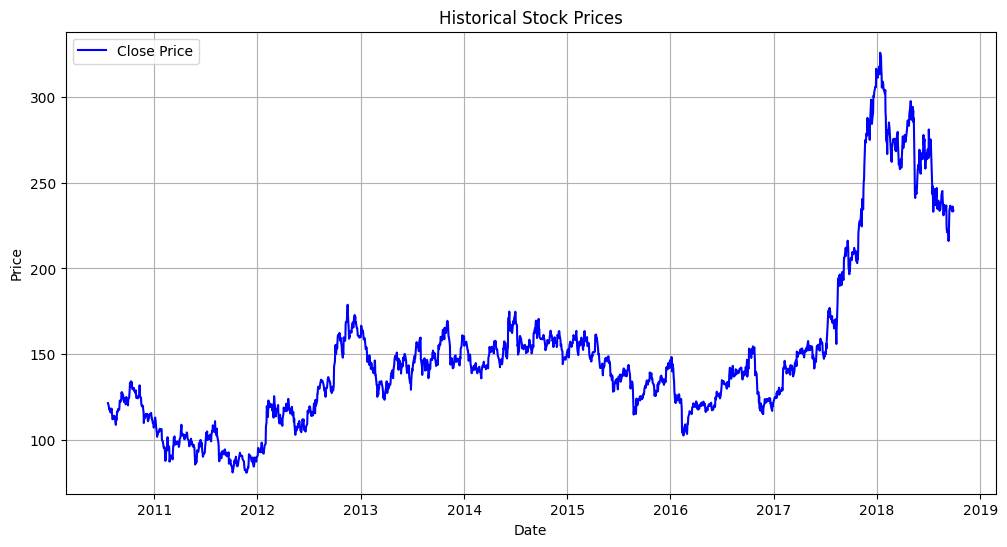

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.title('Historical Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

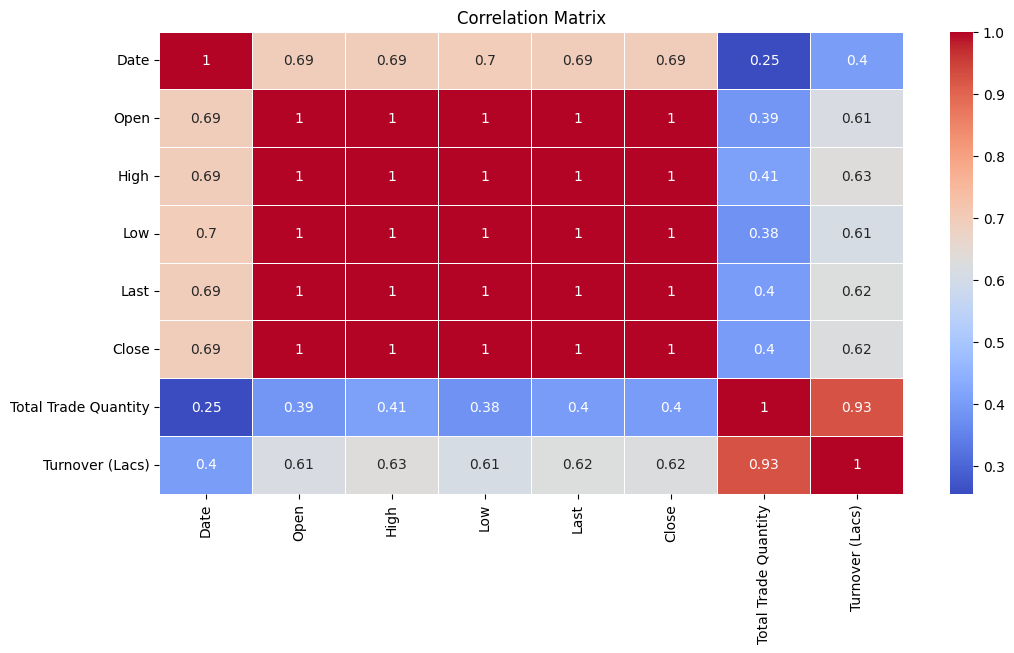

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df['Price_Change'] = df['Close'].shift(-1) - df['Close']
df['Target'] = df['Price_Change'].apply(lambda x: 1 if x > 0 else 0)
df = df.dropna()
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Price_Change,Target
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35,-0.50,0
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95,1.00,1
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60,1.85,1
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90,-2.80,0
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55,1.30,1


In [ ]:
features = ['Open', 'High', 'Low', 'Close', 'Total Trade Quantity', 'Turnover (Lacs)']
x = df[features]
y = df['Target']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.714987714987715
Confusion Matrix:
[[151  57]
 [ 59 140]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.73      0.72       208
           1       0.71      0.70      0.71       199

    accuracy                           0.71       407
   macro avg       0.71      0.71      0.71       407
weighted avg       0.71      0.71      0.71       407



In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf_scores = cross_val_score(model, x, y, cv=cv, scoring='accuracy')

print("Random Forest Cross-validated scores:", rf_scores)
print("Mean accuracy:", rf_scores.mean())
print("Standard deviation:", rf_scores.std())

rf_pred = cross_val_predict(model, x, y, cv=cv)

print("Confusion Matrix:")
print(confusion_matrix(y, rf_pred))
print("Classification Report:")
print(classification_report(y, rf_pred))

accuracy = accuracy_score(y, rf_pred)
print(f'Accuracy: {accuracy}')

Random Forest Cross-validated scores: [0.74692875 0.73710074 0.72727273 0.7002457  0.76108374]
Mean accuracy: 0.7345263310780552
Standard deviation: 0.020462258313616734
Confusion Matrix:
[[798 239]
 [301 696]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75      1037
           1       0.74      0.70      0.72       997

    accuracy                           0.73      2034
   macro avg       0.74      0.73      0.73      2034
weighted avg       0.74      0.73      0.73      2034

Accuracy: 0.7345132743362832


<h1>GridSearchCV</h1>

---



In [ ]:
param_grid = {
    'n_estimators': [20,60,100,120],
    'max_depth': [2,8,None],
    'max_features': [0.2,0.6,1.0],
    'max_samples': [0.5,0.75,1.0]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(x, y)

print("Best parameters found by Grid Search:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found by Grid Search: {'max_depth': None, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 120}
Best cross-validation accuracy: 0.7792704034083345


<h1>RandomSearchCV</h1>

---



In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_grid = RandomizedSearchCV(estimator = model, param_distributions = param_grid, cv = 5, verbose=2, n_jobs = -1)
rf_grid.fit(x_train,y_train)
print("Best parameters found by Grid Search:", rf_grid.best_params_)
print("Best cross-validation accuracy:", rf_grid.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found by Grid Search: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True}
Best cross-validation accuracy: 0.7025181689476168
